In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import random

data = pd.read_csv("all_data.csv")
print(data.head())
data.rename(columns={"Life expectancy at birth (years)":"Life_exp_in_years"}, inplace=True)
print(data.columns)

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
Index(['Country', 'Year', 'Life_exp_in_years', 'GDP'], dtype='object')


In [109]:
'''
Columns: index, Country, Year, Life expectancy at birth (years), GDP
Questions to answer:
    How many unique countries are listed?
    How many years does this data span?
    What is the Life expectancy vs year for each country? (scatterplot)
    What is the GDP vs Life expectancy for each country? (scatterplot)
    What is Life expectancy vs GDP?
    *try to overlap plots with different colors for a legend? (scatterplot)
    In general GDP for each country (histogram)
        -Then look at trends over time - is their GDP and life expectancy changing?
        -Can plot GDP and Life expectancy each year together on same plot?
    Conclusion - which has more correlation to Life expectancy: as time moves on or the GDP?

'''

'\nColumns: index, Country, Year, Life expectancy at birth (years), GDP\nQuestions to answer:\n    How many unique countries are listed?\n    How many years does this data span?\n    What is the Life expectancy vs year for each country? (scatterplot)\n    What is the GDP vs Life expectancy for each country? (scatterplot)\n    What is Life expectancy vs GDP?\n    *try to overlap plots with different colors for a legend? (scatterplot)\n    In general GDP for each country (histogram)\n        -Then look at trends over time - is their GDP and life expectancy changing?\n        -Can plot GDP and Life expectancy each year together on same plot?\n    Conclusion - which has more correlation to Life expectancy: as time moves on or the GDP?\n\n'

In [110]:
# How many unique countries are listed? = 6 countries
print(np.unique(data["Country"]))
# ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [111]:
# How many years does this data span? = 16 years from 2000 - 2015
print(np.unique(data["Year"]))
# [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


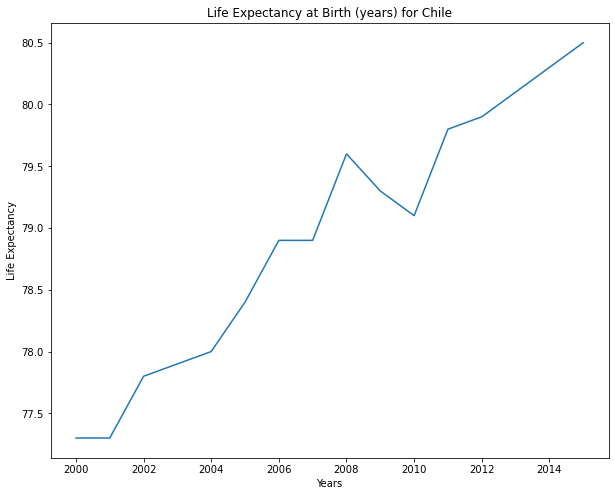

<Figure size 432x288 with 0 Axes>

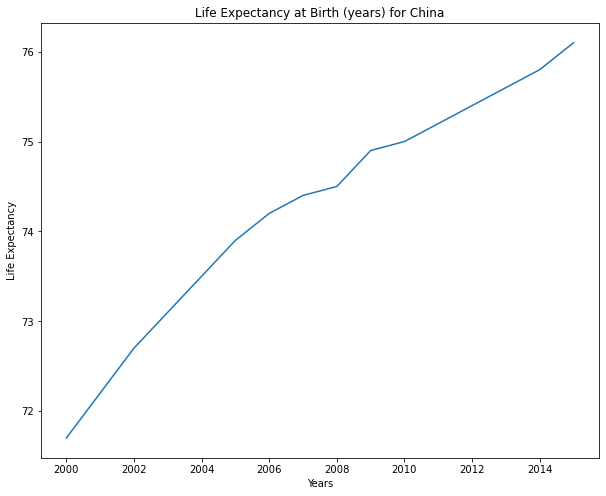

<Figure size 432x288 with 0 Axes>

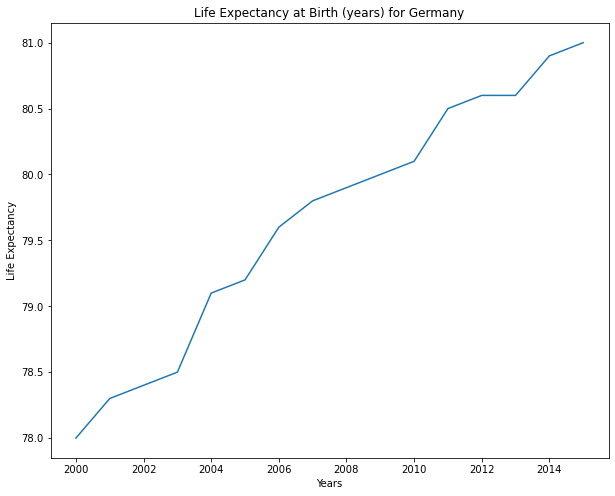

<Figure size 432x288 with 0 Axes>

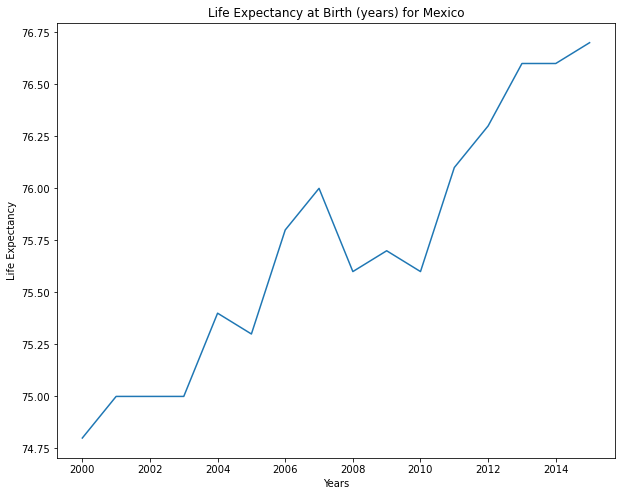

<Figure size 432x288 with 0 Axes>

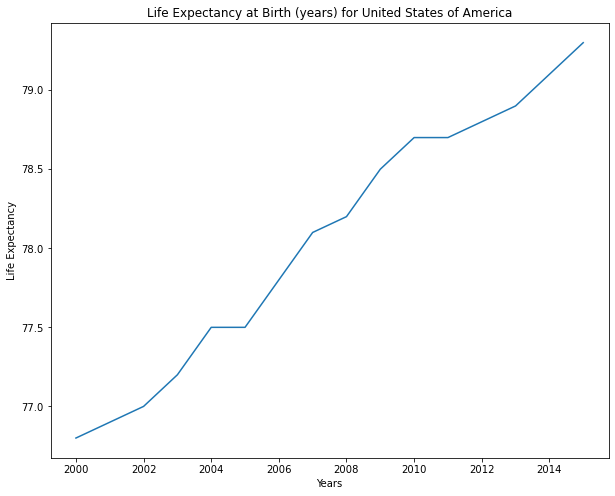

<Figure size 432x288 with 0 Axes>

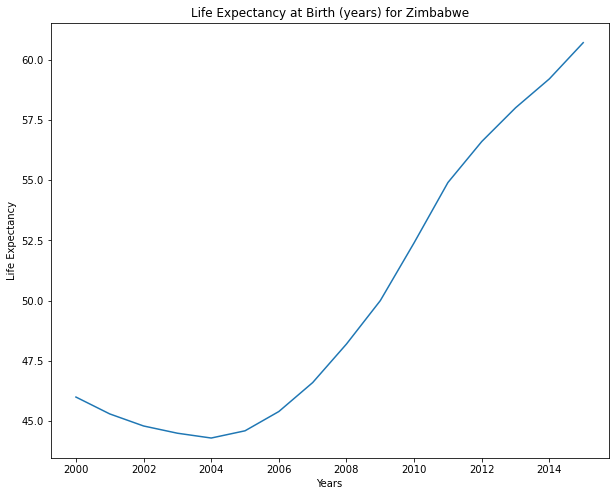

"\nFindings:\nChile: Positive, linear trend with largest dip from 2008 to 2010\nChina: Postive, linear trend with a slight uptick from 2008 to 2009\nGermany: Positive, linear trend with slight plateau from 2012 to 2013\nMexico: Weaker, postive, linear trend with a huge dip beginning in 2007 thru 2010\nUSA: Positive, linear trend with 2004 and 2010 both having plateaus until the next year\nZimbabwe: Quadratic trend with the minimum life expectancy of 45 occurring at 2004 before\nslowly increasing again\n\nMax: As of 2014, Germany and Chile both have life expectanciees in the 80s. \nZimbabwe is in the 60s, and the USA, Mexico, and China are in the 70s.\n\nI wonder if the dip for Chile in 2008 was due to the recession. \nIf so, it is interesting that China had a slight uptick at the same time.\nThe recession may also have longer, lasting effects to contributee to Germany's plateau,\nMexico's larger dig, and the USA's plateau. \n\nI also wonder what effects Zimbabwe put into place or what 

<Figure size 432x288 with 0 Axes>

In [112]:
# What is the Life expectancy vs year for each country? (scatterplot)
unique_countries = np.unique(data["Country"])
for country in unique_countries:
    plt.figure(figsize=(10,8), facecolor="white")
    country_life_exp = data.Life_exp_in_years[data.Country == country]
    country_years = data.Year[data.Country == country]
    plt.plot(country_years,country_life_exp)
    plt.title("Life Expectancy at Birth (years) for " + country)
    plt.xlabel("Years")
    plt.ylabel("Life Expectancy")
    plt.savefig("Life Expectancy at Birth (years) for " + country)
    plt.show()
    plt.clf()
    
'''
Findings:
Chile: Positive, linear trend with largest dip from 2008 to 2010
China: Postive, linear trend with a slight uptick from 2008 to 2009
Germany: Positive, linear trend with slight plateau from 2012 to 2013
Mexico: Weaker, postive, linear trend with a huge dip beginning in 2007 thru 2010
USA: Positive, linear trend with 2004 and 2010 both having plateaus until the next year
Zimbabwe: Quadratic trend with the minimum life expectancy of 45 occurring at 2004 before
slowly increasing again

Max: As of 2014, Germany and Chile both have life expectanciees in the 80s. 
Zimbabwe is in the 60s, and the USA, Mexico, and China are in the 70s.

I wonder if the dip for Chile in 2008 was due to the recession. 
If so, it is interesting that China had a slight uptick at the same time.
The recession may also have longer, lasting effects to contributee to Germany's plateau,
Mexico's larger dig, and the USA's plateau. 

I also wonder what effects Zimbabwe put into place or what their government was like
around 2004 as that was a largr turnaround moment for their population.
'''


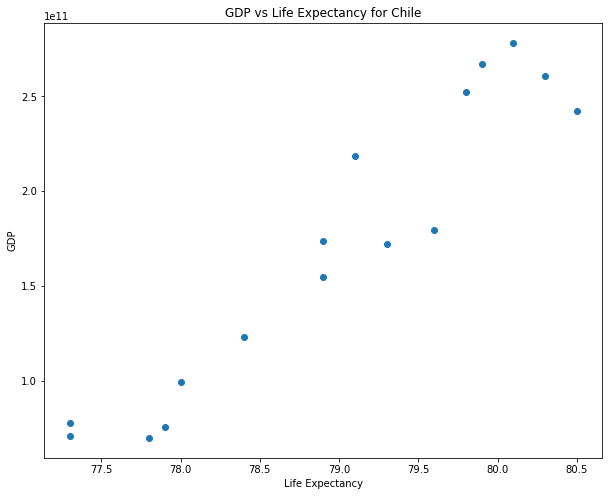

<Figure size 432x288 with 0 Axes>

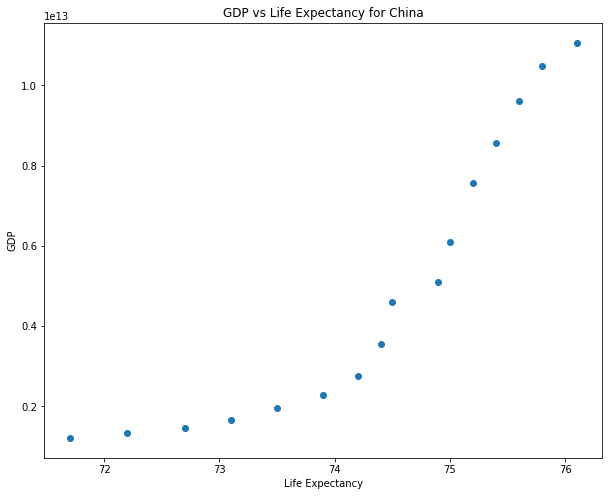

<Figure size 432x288 with 0 Axes>

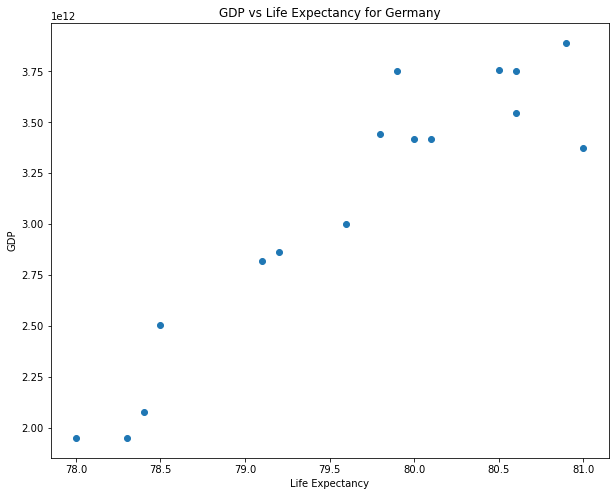

<Figure size 432x288 with 0 Axes>

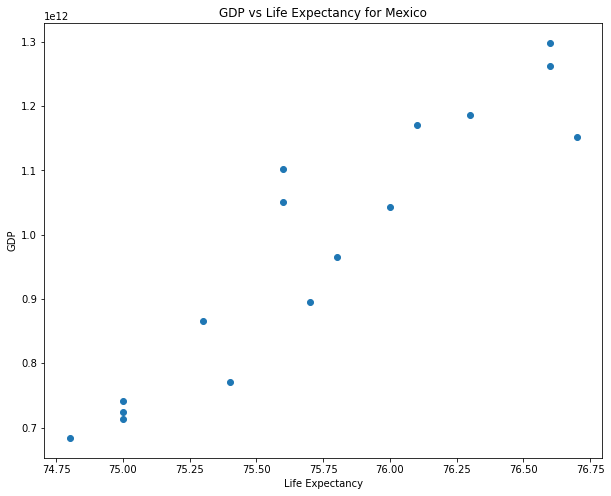

<Figure size 432x288 with 0 Axes>

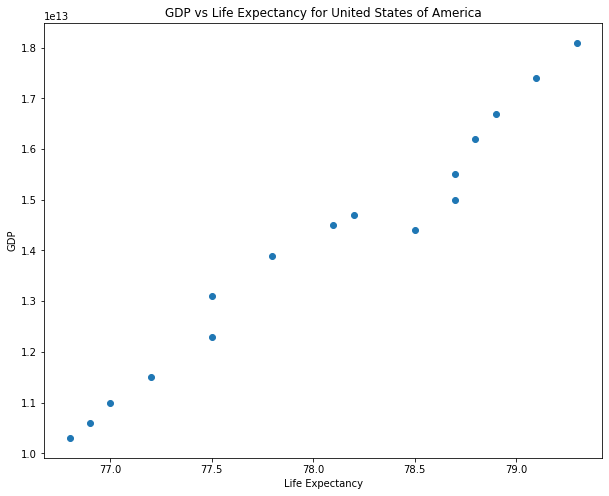

<Figure size 432x288 with 0 Axes>

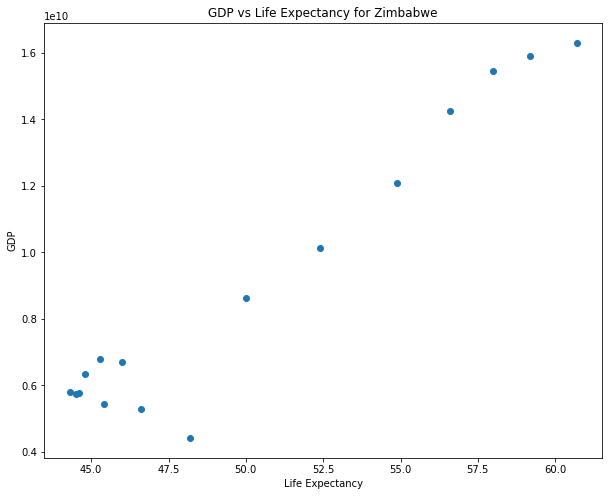

'\nFindings:\nChile: Postive, linear, slight dip in GDP from 80-80.5 expected years\nChina: Positive, curved/exponential increasing more around 74 expected years\nGermany: Positive, linear, slightly plateauing after 80 years\nMexico: Positive, moderate, linear\nUSA: Postive, strong, linear minus the plateau when age is 78-78.5\nZimbabwe: After expected age 50, strong, positive, linear (before is scattered, weak linear).\nMight be plateauing around age 60.\n\nLeast to greatest GDP:\nZimbabwe(1.6+e10), Chile(2.5+e11), Mexico(1.3+e12), Germany(3.75+e12), \nChina(1.0+e13), USA(1.8+e13)\n\nI wonder what main exports each country has or if other countries export large amounts of the \nsame item. Does the USA have a monopoly? Did Zimbabwe change their exports in 2004 to affect the change?\n\n'

<Figure size 432x288 with 0 Axes>

In [113]:
# What is the GDP vs Life expectancy for each country? (scatterplot)
unique_countries = np.unique(data["Country"])
for country in unique_countries:
    plt.figure(figsize=(10,8), facecolor="white")
    country_life_exp = data.Life_exp_in_years[data.Country == country]
    country_gdp = data.GDP[data.Country == country]
    plt.scatter(country_life_exp, country_gdp)
    plt.title("GDP vs Life Expectancy for " + country)
    plt.xlabel("Life Expectancy")
    plt.ylabel("GDP")
    plt.savefig("GDP vs Life Expectancy for " + country)
    plt.show()
    plt.clf()
    
'''
Findings:
Chile: Postive, linear, slight dip in GDP from 80-80.5 expected years
China: Positive, curved/exponential increasing more around 74 expected years
Germany: Positive, linear, slightly plateauing after 80 years
Mexico: Positive, moderate, linear
USA: Postive, strong, linear minus the plateau when age is 78-78.5
Zimbabwe: After expected age 50, strong, positive, linear (before is scattered, weak linear).
Might be plateauing around age 60.

Least to greatest GDP:
Zimbabwe(1.6+e10), Chile(2.5+e11), Mexico(1.3+e12), Germany(3.75+e12), 
China(1.0+e13), USA(1.8+e13)

I wonder what main exports each country has or if other countries export large amounts of the 
same item. Does the USA have a monopoly? Did Zimbabwe change their exports in 2004 to affect the change?

'''



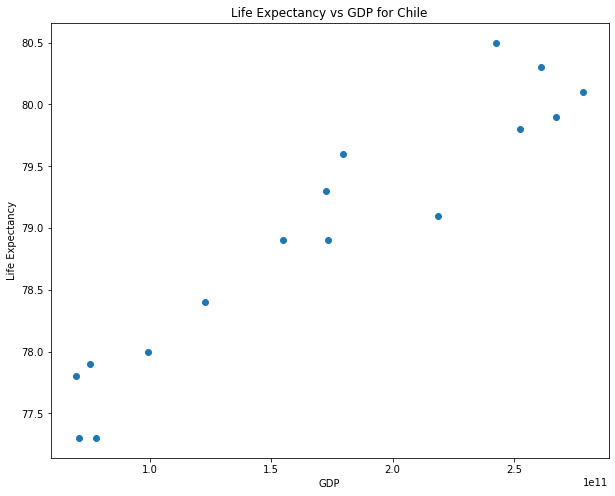

<Figure size 432x288 with 0 Axes>

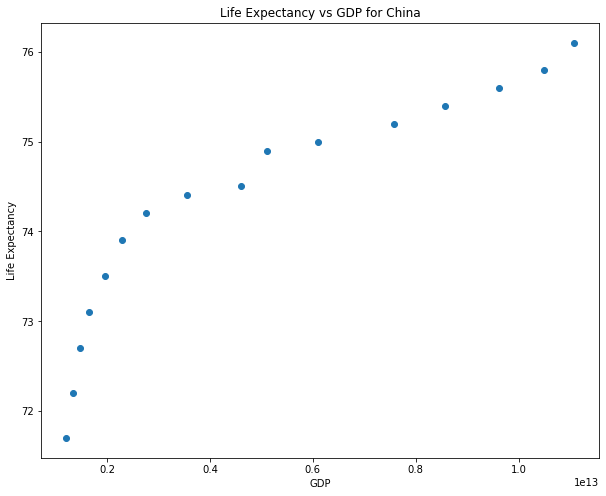

<Figure size 432x288 with 0 Axes>

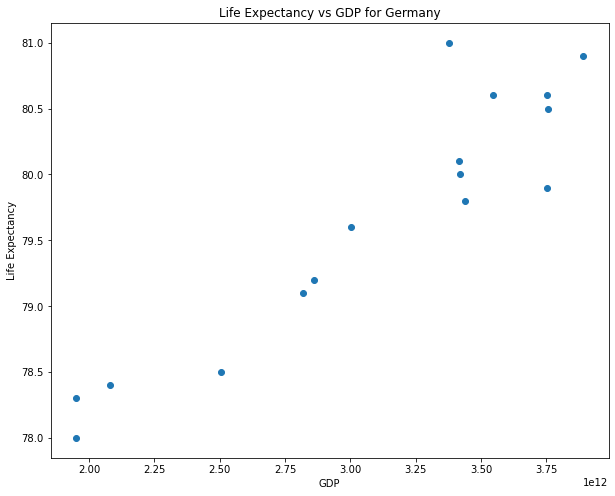

<Figure size 432x288 with 0 Axes>

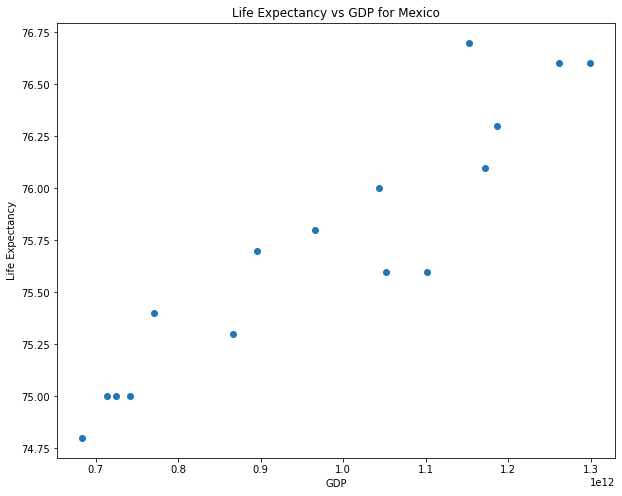

<Figure size 432x288 with 0 Axes>

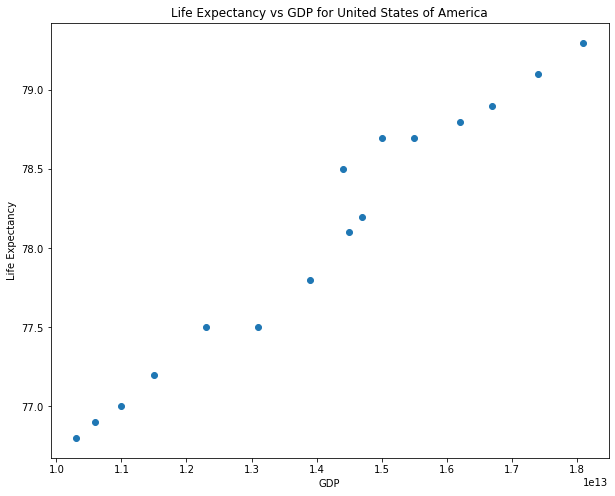

<Figure size 432x288 with 0 Axes>

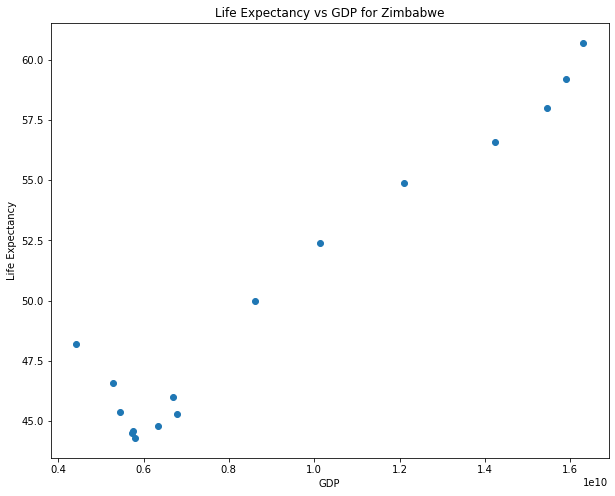

'\nFindings:\nAt first I was wondering if GDP or time affects Life Expectancy the most.\nBut, after looking at these graphs, since Life Expectancy is a measure of time,\nit truly does belong on the x-axis and seeing it affect the GDP instead of vice versa.\n'

<Figure size 432x288 with 0 Axes>

In [114]:
# What is Life expectancy vs GDP?
unique_countries = np.unique(data["Country"])
for country in unique_countries:
    plt.figure(figsize=(10,8), facecolor="white")
    country_life_exp = data.Life_exp_in_years[data.Country == country]
    country_gdp = data.GDP[data.Country == country]
    plt.scatter(country_gdp, country_life_exp,)
    plt.title("Life Expectancy vs GDP for " + country)
    plt.ylabel("Life Expectancy")
    plt.xlabel("GDP")
    plt.savefig("Life Expectancy vs GDP for " + country)
    plt.show()
    plt.clf()
    
'''
Findings:
At first I was wondering if GDP or time affects Life Expectancy the most.
But, after looking at these graphs, since Life Expectancy is a measure of time,
it truly does belong on the x-axis and seeing it affect the GDP instead of vice versa.
'''




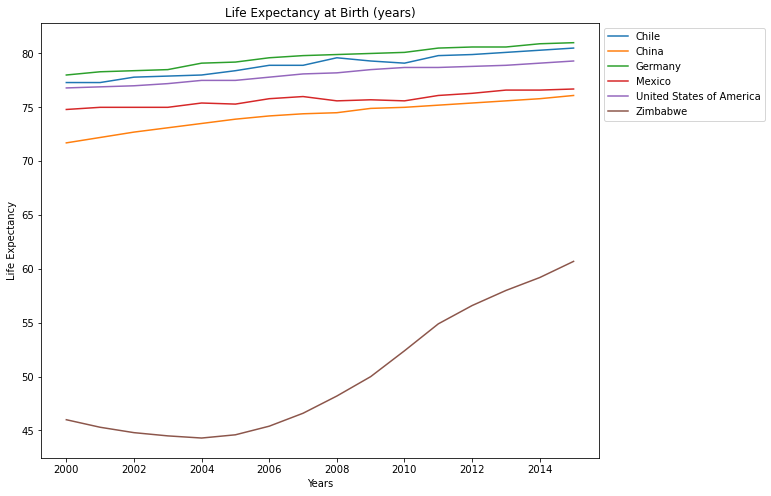

<Figure size 432x288 with 0 Axes>

In [115]:
# Visual for all life expectancy, color code for country (by hue)
unique_countries = np.unique(data["Country"])
plt.figure(figsize=(10,8), facecolor="white")
for country in unique_countries:
    country_life_exp = data.Life_exp_in_years[data.Country == country]
    country_years = data.Year[data.Country == country]
    plt.plot(country_years,country_life_exp)
plt.title("Life Expectancy at Birth (years)")
plt.xlabel("Years")
plt.ylabel("Life Expectancy")
plt.legend(['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe'], bbox_to_anchor=(1,1), loc="upper left")
plt.savefig("life_exp_all_per_year.png")
plt.show()
plt.clf()

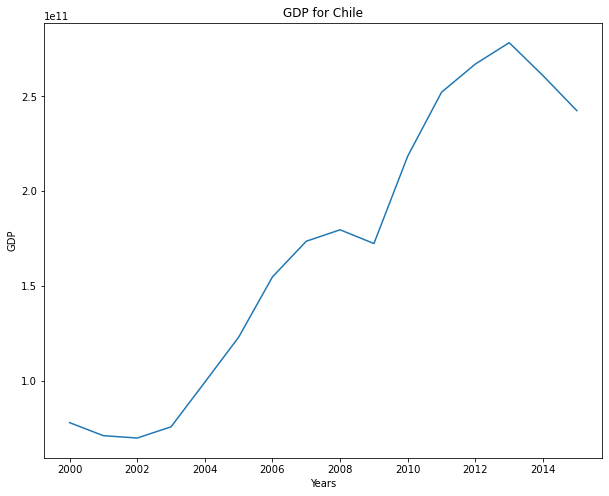

<Figure size 432x288 with 0 Axes>

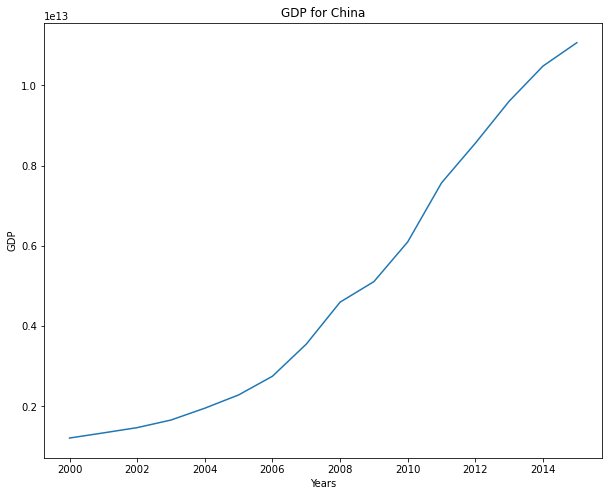

<Figure size 432x288 with 0 Axes>

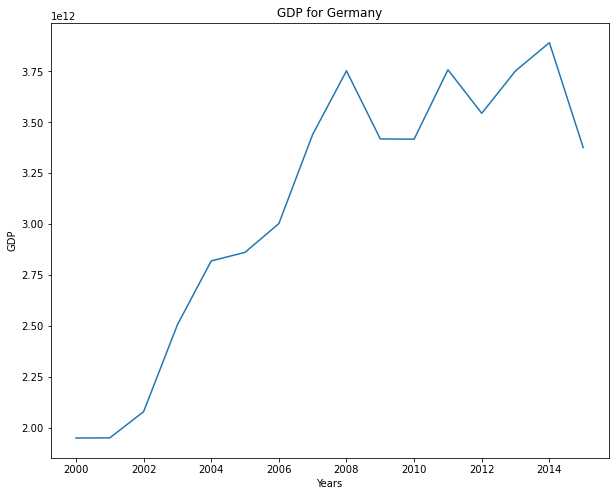

<Figure size 432x288 with 0 Axes>

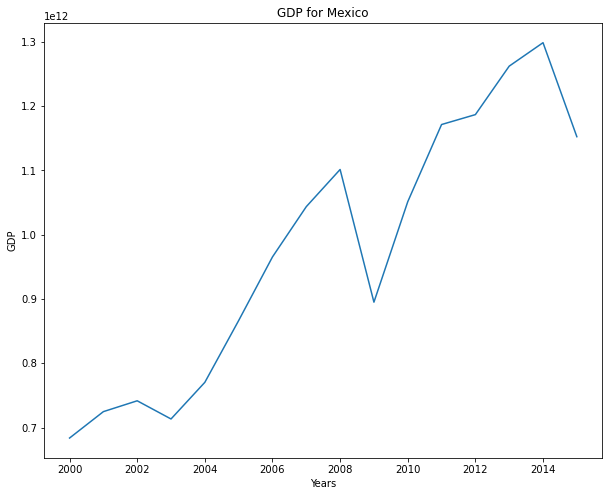

<Figure size 432x288 with 0 Axes>

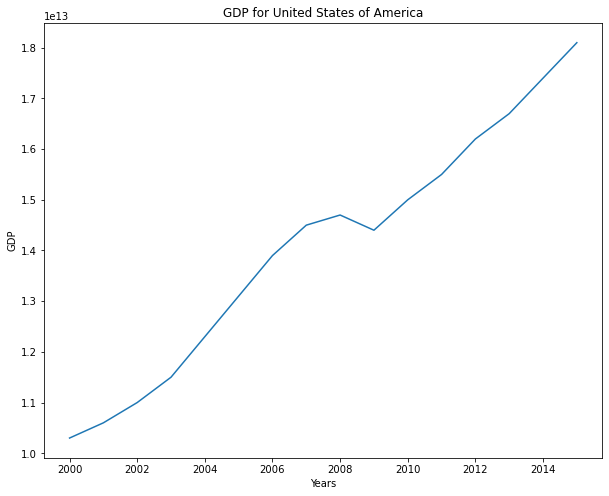

<Figure size 432x288 with 0 Axes>

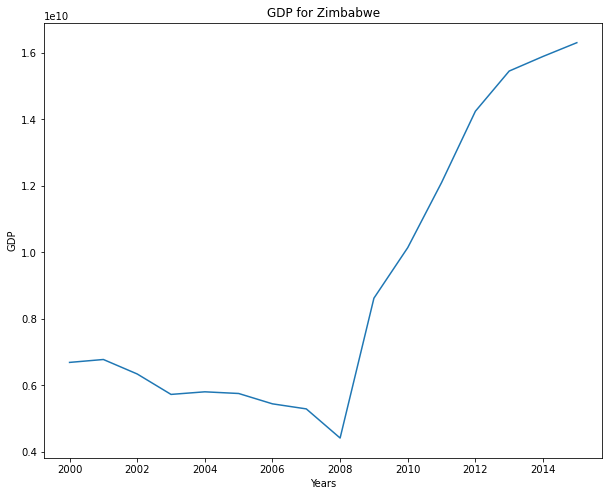

"\nFindings:\nChile: Moderate, positive, linear trend with largest dip from 2008 to 2009 as well\nas a decline beginning in 2012\nChina: Postive, linear trend with a slight uptick from 2008 to 2009 and an increasing\nrate beginning in 2006\nGermany: Starts with positive, linear trend but in 2008, the GDP decreases and oscillates\nthru 2014\nMexico: Overall postive, linear trend with a huge dip beginning in 2008 thru 2009, recovered,\nand then had another dip in 2014\nUSA: Positive, linear trend with 2008 having a slight dip before recovering\nZimbabwe: Starts with slight negative linear relation between GDP and years, but as\nof 2008, the GDP increases steeply and seems to be leveling off after 2014.\n\nRecession Impacts: China had a slight uptick in GDP when 2008's bulk of the recession \nimpacted the world. Zimbabwe changed their exports or were sought after for exports due \nto cheaper prices? What caused Zimbabwe to imprve so much in 2008 with the recession\nwhile also increasing l

<Figure size 432x288 with 0 Axes>

In [116]:
# What is the GDP vs year for each country? (scatterplot)
unique_countries = np.unique(data["Country"])
for country in unique_countries:
    plt.figure(figsize=(10,8), facecolor="white")
    country_gdp = data.GDP[data.Country == country]
    country_years = data.Year[data.Country == country]
    plt.plot(country_years,country_gdp)
    plt.title("GDP for " + country)
    plt.xlabel("Years")
    plt.ylabel("GDP")
    plt.savefig("GDP for " + country)
    plt.show()
    plt.clf()
    
'''
Findings:
Chile: Moderate, positive, linear trend with largest dip from 2008 to 2009 as well
as a decline beginning in 2012
China: Postive, linear trend with a slight uptick from 2008 to 2009 and an increasing
rate beginning in 2006
Germany: Starts with positive, linear trend but in 2008, the GDP decreases and oscillates
thru 2014
Mexico: Overall postive, linear trend with a huge dip beginning in 2008 thru 2009, recovered,
and then had another dip in 2014
USA: Positive, linear trend with 2008 having a slight dip before recovering
Zimbabwe: Starts with slight negative linear relation between GDP and years, but as
of 2008, the GDP increases steeply and seems to be leveling off after 2014.

Recession Impacts: China had a slight uptick in GDP when 2008's bulk of the recession 
impacted the world. Zimbabwe changed their exports or were sought after for exports due 
to cheaper prices? What caused Zimbabwe to imprve so much in 2008 with the recession
while also increasing life expectancy in 2004?

'''

